<a href="https://colab.research.google.com/github/LSMISN/NSI/blob/master/Structures_de_donn%C3%A9es_lin%C3%A9aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction : notion de TAD

Les algorithmes sont décrits pour traiter informatiquement des problèmes. Les données manipulées sont de nature très différentes suivant les domaines étudiés. On s'applique à créer des algorithmes "génériques" capables de traiter tous les types de données. Ces types de données ne font souvent pas partis des types de bases des langages de programmation. Cela permet de rendre indépendant la description de l'algorithme de son implémentation dans un langage particulier. On parle alors de TYPE ABSTRAIT de DONNÉE (TAD). On décrit la forme de la donnée, et les traitements que l'on peut faire dessus.

Un type abstrait de données (aussi appelé TAD) consiste en :

- un ensemble de valeurs possibles (aussi appelé type)

- un ensemble d'opérations agissant sur ces valeurs (prédicats)

- Il s'agit d'un exemple classique de composant modulaire.

Dans cette partie du cours, nous nous intéresserons qu'aux structures de données abstraite linéaires que sont les listes, les piles et les files.

En effet, ces TAD sont identiques dans leur structure, mais possèdent des comportements différents.

Ces TAD sont très utilisés dans les algorithmes de tri, d'ordonnancement, de gestion mémoire (appels de fonctions) par exemple.

## Type de donnée abstrait LISTE

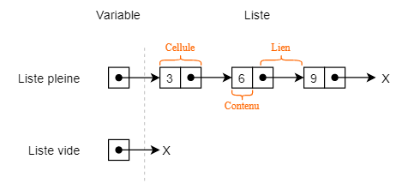

- Une liste est caractérisée par un ensemble de **cellules**
- Chaque cellule contient une valeur et un lien vers la cellule suivante
- Une liste peut être vide

Une définition récursive d'une liste est :
Une liste c'est :

- soit une liste vide, notée ∆ ;
- soit un couple (e, L), appelé cellule, avec :
--  e l'étiquette de la cellule (la valeur stockée)
-- L le reste de la liste

On commence par implémenter une fonction qui permettra de génèrer une liste vide conformement à la définition du TAD.

In [ ]:
def liste_vide():
  """
  liste_vide: () -> Liste
  produit la liste vide
  """
  return []

On écrit une fonction qui permet de créer une cellule, deuxième point de la définition du TAD

In [ ]:
def cellule(e, l):
    """à partir d'une étiquette e et d'une liste l,
    produit la liste (e,l)
    """
    l=[e,l]
    return l

On vient de définir ce qui correspondrait au constructeur d'un objet liste si on avait utilisé la POO. 
On va pouvoir définir 2 fonctions d'accession qui vont permettre de lire la valeur de l'étiquette d'une part, et d'obtenir le reste de la liste d'autre part.

In [ ]:
def etiquette(l):
  """
  etiquette : Liste -> etiquette
  renvoie la donnée présente (étiquette) de la liste
  fournie en paramètre
  """
  return l[0]

def suite(l):
  """
  suite : Liste -> Liste
  renvoie la suite de la liste l passée en
  paramètre de la fonction
  """
  return l[1]

Notion de prédicat

Le prédicat est une fonction qui réalise une action élémentaire sur le TAD.

un prédicat utile est celui qui permet de savoir si une liste est vide, sa définition est :

est_vide : Liste -> booléen

Compléter le code de son implémentation

In [ ]:
# Predicat
def est_vide(liste):
    """
    est_vide : Liste -> booléen
    à partir d'une liste L, produit un booléen
    indiquant si L est la liste vide
    """
    return liste == liste_vide()

exemples d'utilisation

In [ ]:
# on peut commencer par créer une variable l1 qui est la liste vide
l1 = liste_vide()
print(l1)
# on peut également tester le prédicat
print(est_vide(l1))

[]
True


In [ ]:
# on peut créer une liste l2=[5]->[3]->[7]->[]
l2 = cellule(5, cellule(3, cellule(7,liste_vide())))
print(l2)

[5, [3, [7, []]]]


Implémentation sous forme objet

On crée une classe cellule

In [ ]:
class Cellule:
  liste_vide = None

  def __init__(self, etiquette, liste):
    self._valeur = etiquette
    self._suivant = liste
  # accesseurs
  def valeur(self):
    return self._valeur
  
  def suite(self):
    return self._suivant
  # predicat
  def est_vide(self):
    return self is liste_vide

Exemples d'utilisation de la classe

In [ ]:
L1 = Cellule(3, Cellule.liste_vide)
print(L1) # cette instruction ne renvoie que la référence de l'objet en mémoire
print(L1.valeur())
print(L1.est_vide())

3
False


Autres exemples

In [ ]:
c1 = Cellule(9, Cellule.liste_vide) # c1 = [9]->[]
c2 = Cellule(6, c1) # c2 = [6]-> c1, cela donne : c2 = [6]->[9]->[]
L2 = Cellule(3, c2) # L2 = [3]-> c2, cela donne : L2 = [3]->[6]->[9]->[] 
print(L2.valeur()) # renvoie 3
print(L2.suite().valeur()) # renvoie 6
print(L2.suite().suite().est_vide()) # renvoie False


3
6
False


A FAIRE PAR VOUS MÊME : 

En utilisant la classe cellule, écrire le code pour créer la liste [4]->[3]->[2]->[1]

In [ ]:
# créer la liste [4]->[3]->[2]->[1]->[]

c1 = Cellule(1, Cellule.liste_vide) # c1 = [1]->[]
c2 = Cellule(2, c1) # c2 = [2]-> c1, cela donne : c2 = [2]->[1]->[]
c3 = Cellule(3, c2) # c3 = [3]-> c2, cela donne : c3 = [3]->[2]->[1]->[]
L3 = Cellule(4, c3) # L3 = [4]-> c3, cela donne : L3 = [4]->[3]->[2]->[1]->[] 


## Les Piles et les Files

- Les files et piles sont comme des sacs.

- Une file est dite <span style="color:green;">First-In First-Out (FIFO)</span> :
On insère un élément par la queue de la file
On prend un élément par le devant de la file
- Une pile est dite <span style="color:green;">Last-In First-Out (LIFO)</span> :
On insère un élément sur le dessus de la pile
On prend un élément sur le dessus de la pile

### Type abstrait

Ces types abstraits de données nous permettent de :
- Savoir si la structure est vide
- Récupérer un élément
- Insérer un élément

Dans la majorité des cas :
- Empiler/Enfiler un élément se dit push
- Dépiler/Défiler un élément se dit pop

Attention : Le fait de récupérer un élément l'enlève de la pile/file. Il faudra donc le réinsérer si on souhaite le garder.

### Vocabulaire

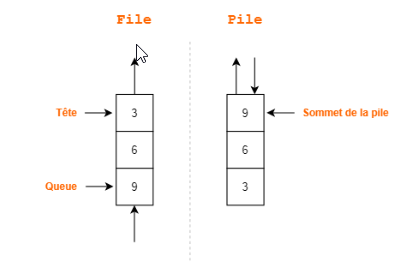

- Une file pop un élément de la tête et push un élément dans la queue
- Une pile pop et push les éléments sur le sommet de la pile uniquement

### Exemple de plusieurs opérations Push sur une file et une pile

On peut représenter une file/pile (nommée s) comme suit :

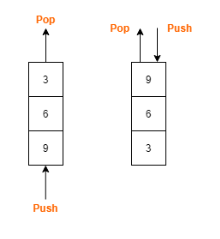

Ces structures sont le résultat du code suivant :

s.push(3)

s.push(6)

s.push(9)






### Exemple de plusieurs opérations Pop sur une file et une pile

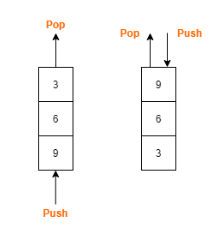

file.pop() -> 3
pile.pop() -> 9


### FILES
Les files sont largement utilisées lorsque l'on veut modéliser une file d'attente.

Par exemple :
- Les impressions sont gérées par une file.
- Dans une simulation de guichet, on modélisera généralement l'arrivée des clients par une file.

### TAD FILE

Le constructeur sera :
- file_vide() renvoie la file_vide
- file(valeur, file f) renvoie une file

Des fonctions : 

- push(valeur, file f) renvoie une file en ajoutant la valeur dans la file f 
- pop(file f) renvoie l'élément en tête de la file f et la nouvelle file sans l'élément.

Prédicat :
- est_vide(file f) renvoie un booléen indiquant si la file f est vide ou pas.

Voici une première implémentation en utilisant les fonctions intégrées des lists Python pop() et append().

Remarque: on a inséré des assertions en fin de code pour tester les fonctions.

In [ ]:
""" Implémentation fonctionnelle utilisant les fonctions
Python pop et append """

# constructeur
def file_vide():
  """ renvoie la file vide """
  return []

# les fonctions
def push(valeur, file):
  """
  renvoie une file qui est la file
  passée en argument dans laquelle
  on a enfilé la valeur
  """
  if est_vide(file):
    return file_vide().append(valeur)
  file.append(valeur)
  return file

def pop(file):
  """
  renvoie la valeur présente en tête
  de file et le reste de la file sans
  cette valeur.
  """
  val = file.pop(0)
  return (val, file)

# predicat
def est_vide(file):
  """
  renvoie un booléen qui indique
  si la file passée en argument
  est vide ou pas
  """
  return file is file_vide()

# Test de nos fonctions sous forme d'assertion
L1 = file_vide() # L1 : []
assert L1 == []
assert push(3, L1) == [3] # L1 : [3]
assert est_vide(L1) == False
assert push(2, L1) == [3,2] # L1 : [3,2]
assert push(4,L1)  == [3, 2, 4] # L1 : [3, 2, 4]
assert push(1, L1) == [3, 2, 4, 1] # L1: [3, 2, 4, 1]
assert pop(L1) == (3, [2, 4, 1])

for i in range(10, 40, 10):
  push(i, L1)
assert L1 == [2, 4, 1, 10, 20, 30]

Dans l'implémentation qui suit on utilise la récursivité. La structure résultante est une list de list imbriquée. Elle reste cependant conforme au TAD File.

In [ ]:
""" Implémentation fonctionnelle récursive """

# constructeur
def file_vide():
  """ renvoie la file vide """
  return []

def file(valeur, file):
  """
  renvoie une file correspondant à la 
  file passée en argument à laquelle
  on a rajouté la valeur.
  """
  return [valeur, file]

# les fonctions
def push(valeur, file):
  """
  renvoie une file qui est la file
  passée en argument dans laquelle
  on a enfilé la valeur
  """
  if est_vide(file):
    return [valeur, file_vide()]
  return [file[0], push(valeur, file[1])]

def pop(file):
  """
  renvoie la valeur présente en tête
  de file et le reste de la file sans
  cette valeur.
  """
  return (file[0], file[1])
# predicat
def est_vide(file):
  """
  renvoie un booléen qui indique
  si la file passée en argument
  est vide ou pas
  """
  return file == file_vide()

Exemples d'application de l'implémentation

In [ ]:
F1 = file_vide()
F1 = push(3,F1)
print(F1) # [3,[]]

F1 = push(6, F1)
print(F1) # [3,[6, []]]

resultat = pop(push(9,F1))
print(resultat)

[3, []]
[3, [6, []]]
(3, [6, [9, []]])


### Implémentation objet

In [ ]:
class File:
  file_vide = None
  
  def __init__(self, valeur, file):
    self._valeur = valeur
    self._suite = file
  
  def push(self,valeur):
    if File.est_vide(self._suite):
      self._suite = File(valeur, File.file_vide)
    else:
      self._suite.push(valeur)
    return self
  
  def pop(self):
    return (self._valeur, self._suite)
  
  def est_vide(file):
    return file is File.file_vide

### exemple d'utilisation

In [ ]:
F1 = File(3, File.file_vide)
print(F1.pop())

F2 = File(3, File.file_vide)
F2.push(6).push(9)
# F2: <--[2]<--[6]<--[9]<--
(val, F2) = F2.pop()
F3 = File(val, File.file_vide)
while not File.est_vide(F2):
  (val, F2) = F2.pop()
  F3.push(val)
# F3: <--[3]<--[6]<--[9]<--

(3, None)


### PILES

Les piles sont omniprésentes en informatique :

Par exemple :

- L'annulation de commande (CTRL-Z) est gérée par une pile.
- Vérifier si une expression est bien parenthésée nécessite une pile.
- Évaluer une expression arithmétique peut être fait avec une pile.

## TAD Pile

Le constructeur sera :
- pile_vide() renvoie la pile_vide
- pile(valeur, pile p) renvoie la pile p avec valeur au sommet

Des fonctions : 

- push(valeur, pile p) ajoute une valeur à la pile p
- pop(pile p) renvoie l'élément au sommet de p et p sans l'élément extrait.

Prédicat :
- est_vide(pile p) renvoie un booléen indiquant si la pile p est vide ou pas.


Voici une première implémentation en utilisant les fonctions intégrées des lists Python pop() et append().

Remarque: on a inséré des assertions en fin de code pour tester les fonctions.

In [ ]:
""" Implémentation fonctionnelle utilisant les fonctions
Python pop et append """

# constructeur
def pile_vide():
  """ renvoie la pile vide """
  return []

# les fonctions
def push(valeur, pile):
  """
  renvoie une pile qui est la pile
  passée en argument dans laquelle
  on a empilé la valeur
  """
  if est_vide(pile):
    return pile_vide().append(valeur)
  pile.append(valeur)
  return pile

def pop(pile):
  """
  renvoie la valeur au sommet
  de pile et le reste de la pile sans
  cette valeur.
  """
  val = pile.pop()
  return (val, pile)

# predicat
def est_vide(pile):
  """
  renvoie un booléen qui indique
  si la file passée en argument
  est vide ou pas
  """
  return pile is pile_vide()

# Test de nos fonctions sous forme d'assertion
P1 = pile_vide() # P1 : []
assert P1 == []
assert push(3, P1) == [3] # P1 : [3]
assert est_vide(P1) == False
assert push(2, P1) == [3,2] # P1 : [3,2]
assert push(4,P1)  == [3, 2, 4] # P1 : [3, 2, 4]
assert push(1, P1) == [3, 2, 4, 1] # P1: [3, 2, 4, 1]
assert pop(P1) == (1, [3, 2, 4])

for i in range(10, 40, 10):
  push(i, P1)
assert P1 == [3, 2, 4, 10, 20, 30]

Dans l'implémentation qui suit on utilise la récursivité. La structure résultante est une list de list imbriquée. Elle reste cependant conforme au TAD File.

In [ ]:
def pile_vide():
  return []

def pile(valeur, pile):
  return [valeur, pile]

# Fonctions on considère que le sommet est la première case
def push(valeur, pile):
  return[valeur, pile]

def pop(pile):
  return (pile[0], pile[1])

# predicat
def est_vide(pile):
  return pile == pile_vide()


#### Exemple d'utilisation de cette implémentation

In [ ]:
P1 = pile_vide()
P1 = push(3,P1)
assert P1 == [3,[]]

P1 = push(6,P1)
assert P1 == [6, [3, []]]

resultat = pop(push(9,P1))
assert resultat == (9,[6, [3, []]])

#### implémentation objet

In [ ]:
class Pile:
  pile_vide = None

  def __init__(self, valeur, pile):
    self._valeur = valeur
    self._suite = pile
  
  def push(self, valeur):
    return Pile(valeur, self)
  
  def pop(self):
    return (self._valeur, self._suite)
  
  def est_vide(pile):
    return pile is Pile.pile_vide

# application

P1 = Pile(3, Pile.pile_vide)
assert P1.pop() == (3, None)

P2 = Pile(3, Pile.pile_vide)
P2.push(6).push(9)

## Exercice : vérificateur syntaxique

Implémenter en Python, en utilisant une pile, une fonction permettant de vérifier l’appariement de parenthèses ( [] , ()  ou {}) dans une chaîne de caractères.

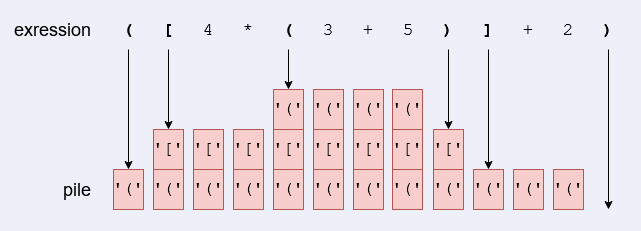

L'analyse de l'expression par la fonction de la chaine "{ ( 5 * 4 ) / 2 }" renvoie True alors "{ ( ( 3 + 7 ) / 2 ) x 3 ] )}" renvoie false 


In [ ]:
def syntaxeCorrecte(expression : str)->bool:
  """
  balaye l'expression expression fournie sous forme d'une chaine de
  caractères, et renvoie False si les parenthèses (), [], {} ne 
  sont pas refermées correctement.
  On utilisera le TAD Pile implémenté dans un autre fichier pour 
  traiter l'expression
  """
  pass

# assertions de test
assert syntaxeCorrecte("{([5*4])/2}") == True
assert syntaxeCorrecte("{((3+7)/2)x3])}") == False

## Compléments

- ### [Piles et Files en Python dans la documentation officielle paragraphes 5.1.1 et 5.1.2](https://docs.python.org/fr/3/tutorial/datastructures.html)

- ### [Une fiche de synthèse du site pixees](https://pixees.fr/informatiquelycee/n_site/fiches/T/05_liste_pile_file.pdf)